Chapter 15. Trading Strategies

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [2]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
raw = pd.read_csv('tr_eikon_eod_data.csv', index_col=0, parse_dates=True)

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [5]:
symbol = 'AAPL.O'

In [6]:
data = (pd.DataFrame(raw[symbol].dropna()))

In [7]:
SMA1 =42
SMA2 = 252

In [8]:
data['SMA1'] =data[symbol].rolling(SMA1).mean()
data['SMA2'] =data[symbol].rolling(SMA2).mean()


<Axes: xlabel='Date'>

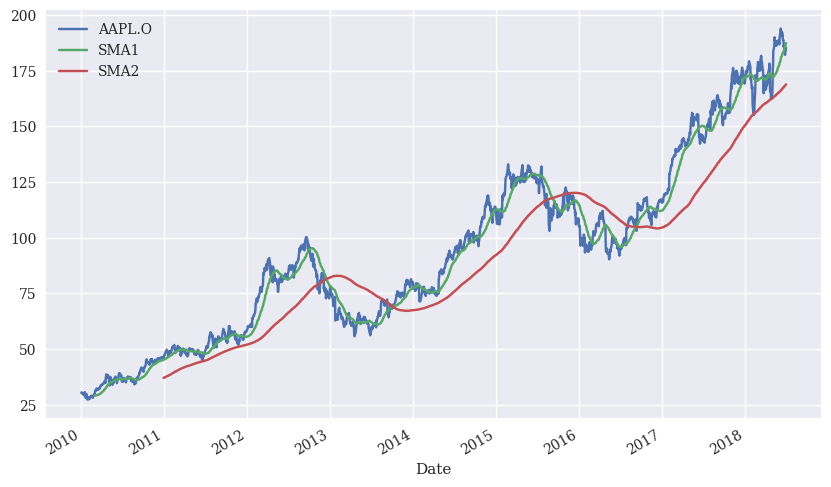

In [9]:
data.plot(figsize=(10,6))

Figure 15-1. Apple stock price and two simple moving averages

In [10]:
data.dropna(inplace=True)

In [11]:
data['Position'] = np.where(data['SMA1']>data['SMA2'],1,-1)

In [12]:
data.tail()

,AAPL.O,SMA1,SMA2,Position
Date,,,,
2018-06-25,182.17,185.606190,168.265556,1
2018-06-26,184.43,186.087381,168.418770,1
2018-06-27,184.16,186.607381,168.579206,1
2018-06-28,185.50,187.089286,168.736627,1
2018-06-29,185.11,187.470476,168.901032,1


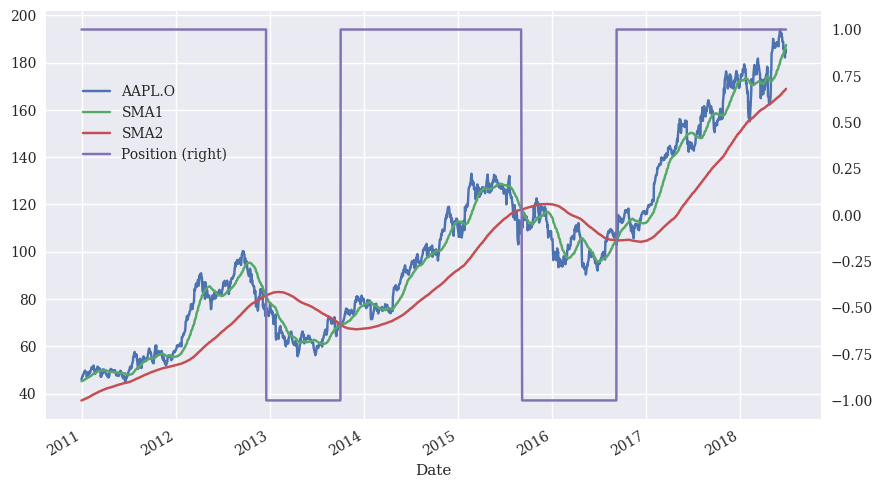

In [13]:
ax =data.plot(secondary_y='Position', figsize=(10,6))
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

Figure 15-2. Apple stock price, two SMAs, and resulting position

In [14]:
data['Returns']=np.log(data[symbol]/data[symbol].shift(1))

In [16]:
data['Strategy']= data['Position'].shift(1)*data['Returns']

In [17]:
data.round(4).head()

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2010-12-31,46.0800,45.2810,37.1207,1,NaN,NaN
2011-01-03,47.0814,45.3497,37.1862,1,0.0215,0.0215
2011-01-04,47.3271,45.4126,37.2525,1,0.0052,0.0052
2011-01-05,47.7142,45.4661,37.3223,1,0.0081,0.0081
2011-01-06,47.6757,45.5226,37.3921,1,-0.0008,-0.0008


In [18]:
data.dropna(inplace=True)

In [19]:
np.exp(data[['Returns','Strategy']].sum())

Returns     4.017148
Strategy    5.811299
dtype: float64

In [20]:
data[['Returns', 'Strategy']].std()*252*0.5

Returns     1.988849
Strategy    1.987543
dtype: float64

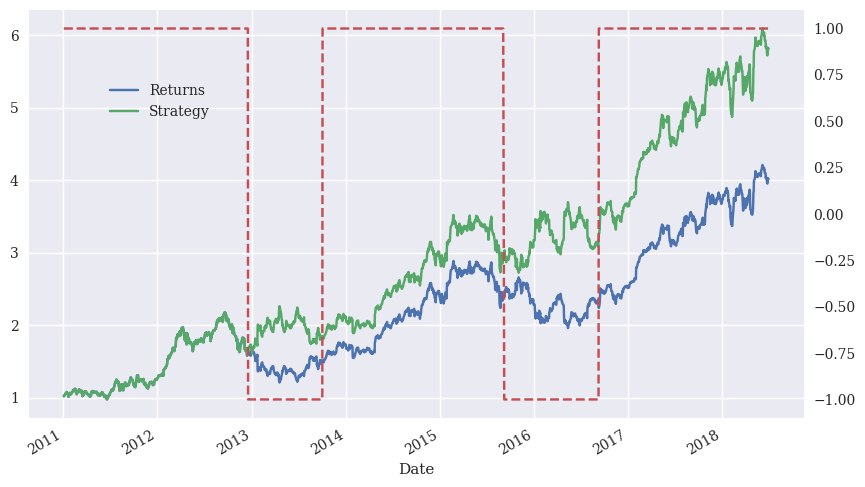

In [21]:
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

Figure 15-3. Performance of Apple stock and SMA-based trading strategy over time.

In [22]:
from itertools import product

In [30]:
sma1 = range(20,61,4)
sma2 = range(180,281,10)

In [31]:
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1,sma2):
    data = pd.DataFrame(raw[symbol])
    data.dropna(inplace=True)
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['SMA1'] = data[symbol].rolling(SMA1).mean()
    data['SMA2'] = data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = pd.concat((results, pd.DataFrame(
                {'SMA1': SMA1, 'SMA2': SMA2,
                 'MARKET': perf['Returns'],
                 'STRATEGY': perf['Strategy'],
                 'OUT': perf['Strategy'] - perf['Returns']},
                 index=[0])), ignore_index=True)  
    #Records the vectorized backtesting results in a DataFrame object.


In [32]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      121 non-null    int64  
 1   SMA2      121 non-null    int64  
 2   MARKET    121 non-null    float64
 3   STRATEGY  121 non-null    float64
 4   OUT       121 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB


In [33]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT
56,40,190,4.650342,7.175173,2.524831
39,32,240,4.045619,6.558690,2.513071
59,40,220,4.220272,6.544266,2.323994
46,36,200,4.074753,6.389627,2.314874
55,40,180,4.574979,6.857989,2.283010
70,44,220,4.220272,6.469843,2.249571
101,56,200,4.074753,6.319524,2.244772


In [34]:
symbol = '.SPX'

In [35]:
data = pd.DataFrame(raw[symbol])

In [39]:
lags = 5
cols = []
for lag in range( 1, lags+1):
    col = 'lag_{}'.format(lag)
    data[col] = data[symbol].shift(lag)
    cols.append(col)

In [40]:
data.head(7)

,.SPX,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,1132.99,NaN,NaN,NaN,NaN,NaN
2010-01-05,1136.52,1132.99,NaN,NaN,NaN,NaN
2010-01-06,1137.14,1136.52,1132.99,NaN,NaN,NaN
2010-01-07,1141.69,1137.14,1136.52,1132.99,NaN,NaN
2010-01-08,1144.98,1141.69,1137.14,1136.52,1132.99,NaN
2010-01-11,1146.98,1144.98,1141.69,1137.14,1136.52,1132.99


In [41]:
data.dropna(inplace=True)

In [42]:
reg = np.linalg.lstsq(data[cols], data[symbol], rcond=-1)[0]

In [43]:
reg.round(3)

array([0.966, 0.005, 0.025, 0.   , 0.003])

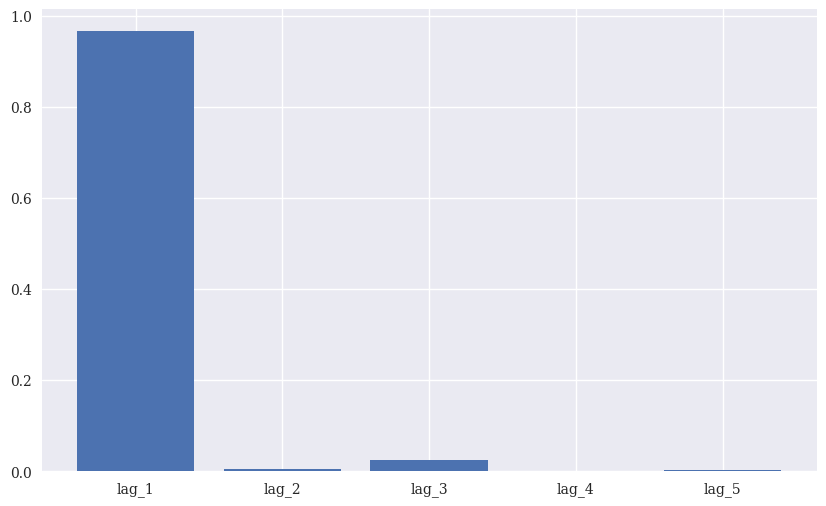

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(cols, reg);

Figure 15-4. Optimal regression parameters from OLS regression for price prediction


In [45]:
data['Prediction'] = np.dot(data[cols], reg)

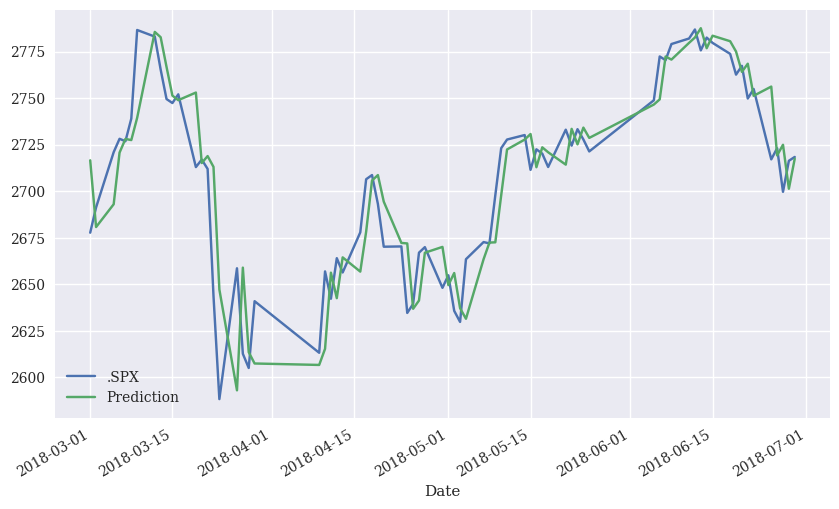

In [46]:
data[[symbol, 'Prediction']].iloc[-75:].plot(figsize=(10, 6));

Figure 15-5. S&P 500 levels compared to prediction values from OLS regression


In [48]:
raw = pd.read_csv('tr_eikon_eod_data.csv',
index_col=0, parse_dates=True).dropna()

In [49]:
raw.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

In [50]:
symbol = 'EUR='

In [51]:
data = pd.DataFrame(raw[symbol])

In [52]:
data['returns'] = np.log(data / data.shift(1))

In [53]:
data.dropna(inplace=True)

In [54]:
data['direction'] = np.sign(data['returns']).astype(int)

In [55]:
data.head()

,EUR=,returns,direction
Date,,,
2010-01-05,1.4368,-0.002988,-1
2010-01-06,1.4412,0.003058,1
2010-01-07,1.4318,-0.006544,-1
2010-01-08,1.4412,0.006544,1
2010-01-11,1.4513,0.006984,1


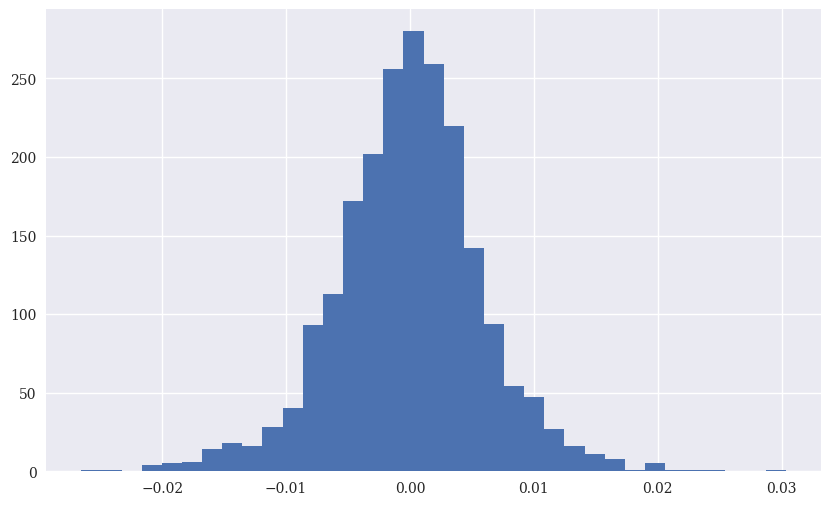

In [56]:
data['returns'].hist(bins=35, figsize=(10, 6));

Figure 15-6. Histogram of log returns for EUR/USD exchange rate


In [57]:
lags = 2

In [58]:
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [59]:
create_lags(data)

In [60]:
data.head()

,EUR=,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-05,1.4368,-0.002988,-1,NaN,NaN
2010-01-06,1.4412,0.003058,1,-0.002988,NaN
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544


In [61]:
data.dropna(inplace=True)

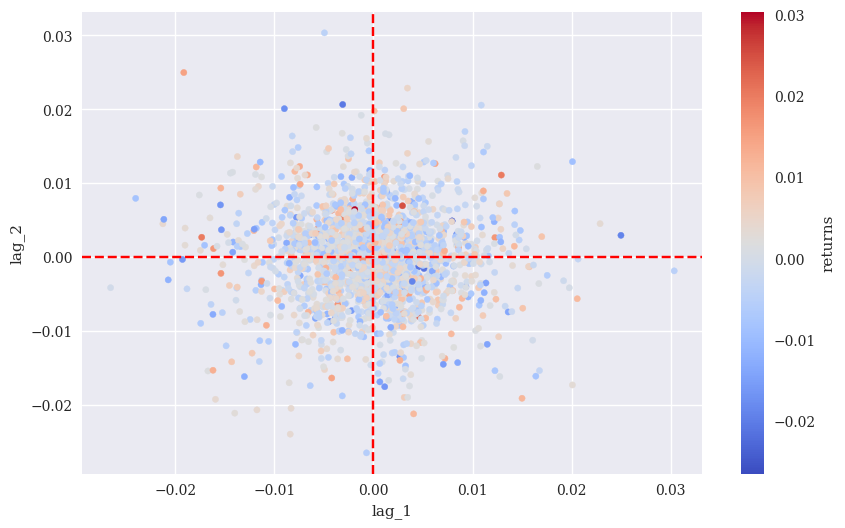

In [62]:
data.plot.scatter(x='lag_1', y='lag_2', c='returns', 
                  cmap='coolwarm', figsize=(10, 6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--');

Figure 15-7. Scatter plot based on features and labels data


In [63]:
from sklearn.linear_model import LinearRegression  

In [64]:
model = LinearRegression()  

In [65]:
data['pos_ols_1'] = model.fit(data[cols], data['returns']).predict(data[cols])  

In [66]:
data['pos_ols_2'] = model.fit(data[cols], data['direction']).predict(data[cols])  

In [67]:
data[['pos_ols_1', 'pos_ols_2']].head()

,pos_ols_1,pos_ols_2
Date,,
2010-01-07,-0.000166,-0.000086
2010-01-08,0.000017,0.040404
2010-01-11,-0.000244,-0.011756
2010-01-12,-0.000139,-0.043398
2010-01-13,-0.000022,0.002237


In [ ]:
data[['pos_ols_1', 'pos_ols_2']] = np.where(
            data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)  
#The real-valued predictions are transformed to directional values (+1, -1)


In [69]:
data['pos_ols_1'].value_counts()  

pos_ols_1
-1    1847
 1     288
Name: count, dtype: int64

In [70]:
data['pos_ols_2'].value_counts()  

pos_ols_2
 1    1377
-1     758
Name: count, dtype: int64

In [71]:
(data['pos_ols_1'].diff() != 0).sum()  

np.int64(555)

In [72]:
(data['pos_ols_2'].diff() != 0).sum()  

np.int64(762)

In [73]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']

In [74]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        0.810644
strat_ols_1    0.942422
strat_ols_2    1.339286
dtype: float64

In [75]:
(data['direction'] == data['pos_ols_1']).value_counts()  

False    1093
True     1042
Name: count, dtype: int64

In [76]:
(data['direction'] == data['pos_ols_2']).value_counts()  

True     1096
False    1039
Name: count, dtype: int64

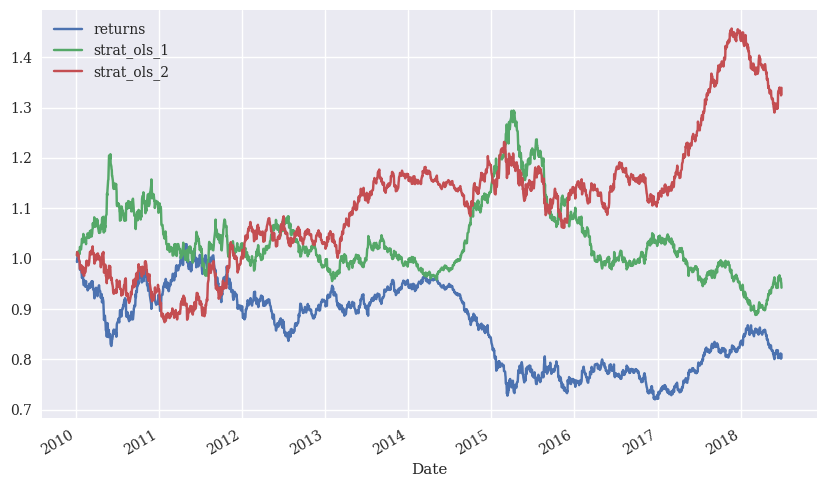

In [77]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));

Figure 15-8. Performance of EUR/USD and regression-based strategies over time


In [78]:
from sklearn.cluster import KMeans

In [79]:
model = KMeans(n_clusters=2, random_state=0)  #  <1>

In [80]:
model.fit(data[cols])

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",2
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",0
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [81]:
data['pos_clus'] = model.predict(data[cols])

In [82]:
data['pos_clus'] = np.where(data['pos_clus'] == 1, -1, 1)  

In [83]:
data['pos_clus'].values

array([ 1,  1,  1, ..., -1,  1,  1], shape=(2135,))

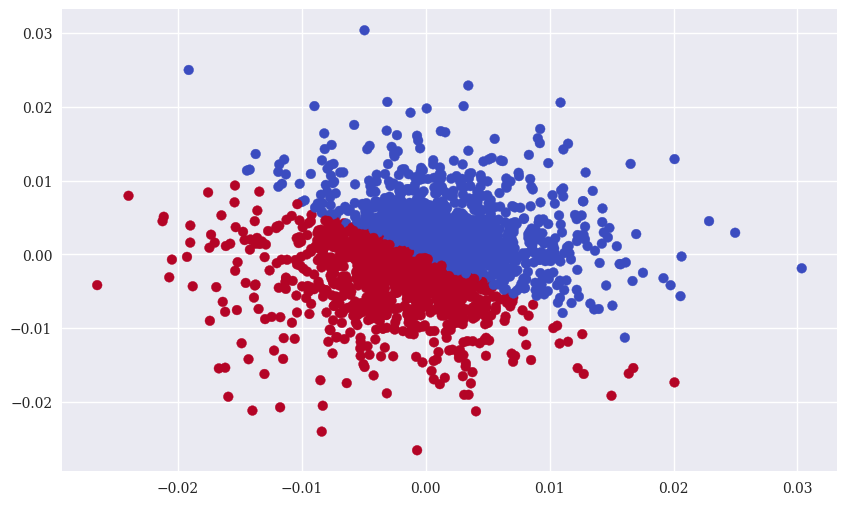

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(data[cols].iloc[:, 0], data[cols].iloc[:, 1],
            c=data['pos_clus'], cmap='coolwarm');

In [85]:
data['strat_clus'] = data['pos_clus'] * data['returns']

In [86]:
data[['returns', 'strat_clus']].sum().apply(np.exp)

returns       0.810644
strat_clus    1.150545
dtype: float64

In [87]:
(data['direction'] == data['pos_clus']).value_counts()

True     1098
False    1037
Name: count, dtype: int64

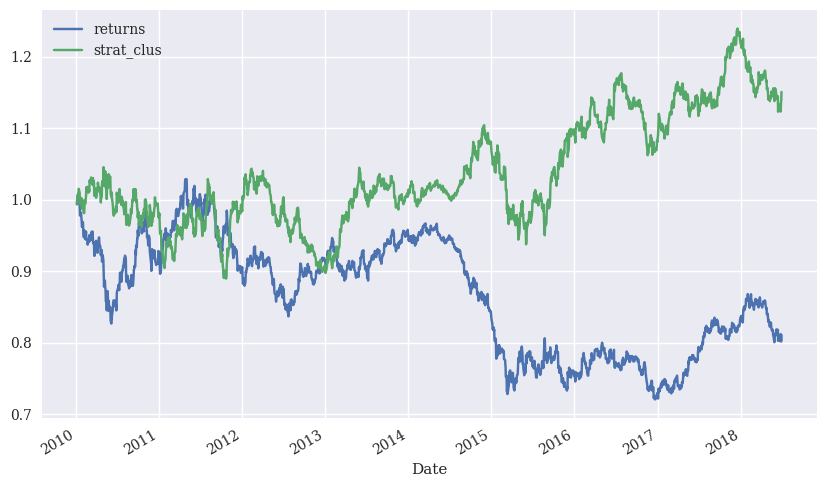

In [88]:
data[['returns', 'strat_clus']].cumsum().apply(np.exp).plot(figsize=(10, 6));

Figure 15-10. Performance of EUR/USD and k-means-based strategy over time


In [89]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)  
        cols_bin.append(col_bin)

In [90]:
create_bins(data)

In [91]:
data[cols_bin + ['direction']].head()  

,lag_1_bin,lag_2_bin,direction
Date,,,
2010-01-07,1,0,-1
2010-01-08,0,1,1
2010-01-11,1,0,1
2010-01-12,1,1,-1
2010-01-13,0,1,1


In [ ]:
grouped = data.groupby(cols_bin + ['direction'])
grouped.size()  #Shows the frequency of the possible movements conditional on the feature value combinations

lag_1_bin  lag_2_bin  direction
0          0          -1           239
                       0             4
                       1           258
           1          -1           262
                       1           288
1          0          -1           272
                       0             1
                       1           278
           1          -1           278
                       0             4
                       1           251
dtype: int64

In [93]:
res = grouped['direction'].size().unstack(fill_value=0)  

In [94]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]  

In [95]:
res.style.apply(highlight_max, axis=1)  

In [96]:
data['pos_freq'] = np.where(data[cols_bin].sum(axis=1) == 2, -1, 1)  

In [97]:
(data['direction'] == data['pos_freq']).value_counts()

True     1102
False    1033
Name: count, dtype: int64

In [98]:
data['strat_freq'] = data['pos_freq'] * data['returns']

In [99]:
data[['returns', 'strat_freq']].sum().apply(np.exp)

returns       0.810644
strat_freq    0.989513
dtype: float64

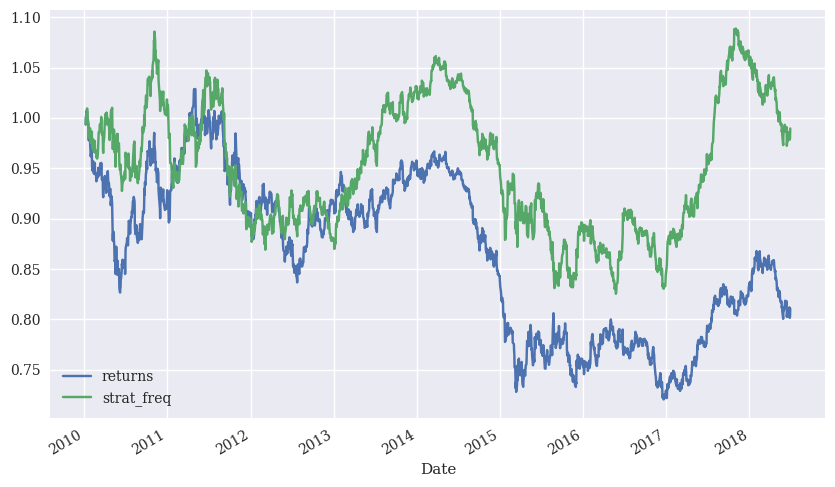

In [100]:
data[['returns', 'strat_freq']].cumsum().apply(np.exp).plot(figsize=(10, 6));

Figure 15-11. Performance of EUR/USD and frequency-based trading strategy over
time

In [101]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [102]:
C=1

In [103]:
models = {
    'log_reg': linear_model.LogisticRegression(C=C),
    'gauss_nb': GaussianNB(),
    'svm': SVC(C=C)
}

In [104]:
def fit_models(data):  
    mfit = {model: models[model].fit(data[cols_bin], data['direction'])
            for model in models.keys()} 

In [105]:
fit_models(data)

In [106]:
def derive_positions(data):  
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])

In [107]:
derive_positions(data)

In [108]:
def evaluate_strats(data):  
    global sel
    sel = []
    for model in models.keys():
        col = 'strat_' + model 
        data[col] = data['pos_' + model] * data['returns']
        sel.append(col)
    sel.insert(0, 'returns')

In [109]:
evaluate_strats(data)

In [110]:
sel.insert(1, 'strat_freq')

In [111]:
data[sel].sum().apply(np.exp)  

returns           0.810644
strat_freq        0.989513
strat_log_reg     1.243322
strat_gauss_nb    1.243322
strat_svm         0.989513
dtype: float64

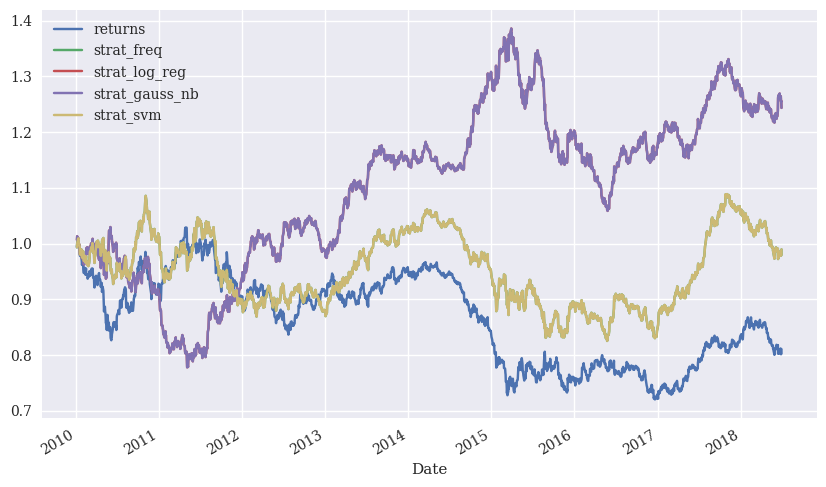

In [112]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

Figure 15-12. Performance of EUR/USD and classification-based trading strategies
(two binary lags) over time

In [113]:
data = pd.DataFrame(raw[symbol])

In [114]:
data['returns'] = np.log(data / data.shift(1))

In [115]:
data['direction'] = np.sign(data['returns'])

In [116]:
lags = 5  
create_lags(data)
data.dropna(inplace=True)

In [117]:
create_bins(data)  
cols_bin

['lag_1_bin', 'lag_2_bin', 'lag_3_bin', 'lag_4_bin', 'lag_5_bin']

In [118]:

data[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2010-01-12,1,1,0,1,0
2010-01-13,0,1,1,0,1
2010-01-14,1,0,1,1,0
2010-01-15,0,1,0,1,1
2010-01-19,0,0,1,0,1


In [119]:
data.dropna(inplace=True)

In [120]:
fit_models(data)

In [121]:
derive_positions(data)

In [122]:
evaluate_strats(data)

In [123]:
data[sel].sum().apply(np.exp)

returns           0.805002
strat_log_reg     0.971623
strat_gauss_nb    0.986420
strat_svm         2.649423
dtype: float64

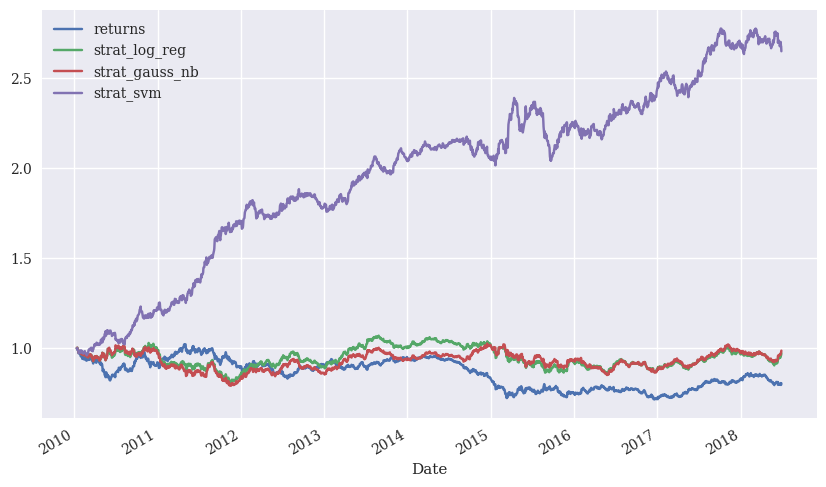

In [124]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

Figure 15-13. Performance of EUR/USD and classification-based trading strategies
(five binary lags) over time

In [125]:
mu = data['returns'].mean()  
v = data['returns'].std()  

In [126]:

bins = [mu - v, mu, mu + v]  
bins  

[np.float64(-0.006033537040418664),
 np.float64(-0.00010174015279231288),
 np.float64(0.005830056734834038)]

In [127]:
create_bins(data, bins)

In [128]:
data[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2010-01-12,3,3,0,2,1
2010-01-13,1,3,3,0,2
2010-01-14,2,1,3,3,0
2010-01-15,1,2,1,3,3
2010-01-19,0,1,2,1,3


In [129]:
fit_models(data)

In [130]:
derive_positions(data)

In [131]:
evaluate_strats(data)

In [132]:
data[sel].sum().apply(np.exp)

returns           0.805002
strat_log_reg     1.431120
strat_gauss_nb    1.815304
strat_svm         7.165290
dtype: float64

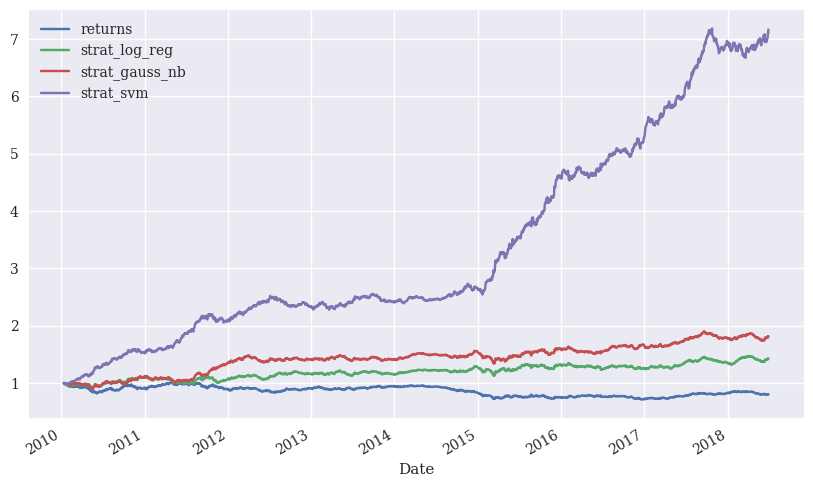

In [133]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

Figure 15-14. Performance of EUR/USD and classification-based trading strategies
(five digitized lags) over time

In [134]:
split = int(len(data) * 0.5)

In [135]:
train = data.iloc[:split].copy()  

In [136]:
fit_models(train)  

In [137]:
test = data.iloc[split:].copy()  

In [138]:
derive_positions(test)  

In [139]:
evaluate_strats(test)  

In [140]:
test[sel].sum().apply(np.exp)

returns           0.850291
strat_log_reg     0.952898
strat_gauss_nb    0.941172
strat_svm         1.020519
dtype: float64

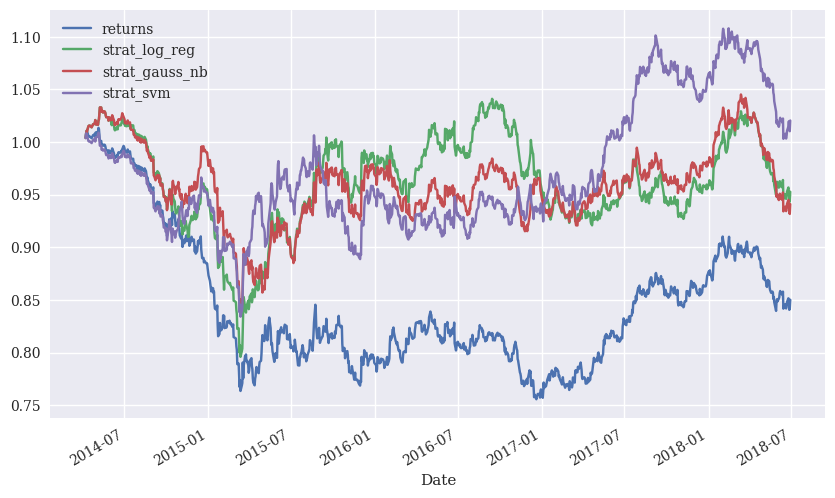

In [141]:
test[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

Figure 15-15. Performance of EUR/USD and classification-based trading strategies
(sequential train-test split)

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
train, test = train_test_split(data, test_size=0.5,
                               shuffle=True, random_state=100)

In [144]:

train = train.copy().sort_index()  

In [145]:
train[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2010-01-12,3,3,0,2,1
2010-01-13,1,3,3,0,2
2010-01-14,2,1,3,3,0
2010-01-15,1,2,1,3,3
2010-01-20,1,0,1,2,1


In [146]:

test = test.copy().sort_index()  

In [147]:
fit_models(train)

In [148]:
derive_positions(test)

In [149]:
evaluate_strats(test)

In [150]:

test[sel].sum().apply(np.exp)

returns           0.878078
strat_log_reg     0.801787
strat_gauss_nb    0.765009
strat_svm         0.730141
dtype: float64

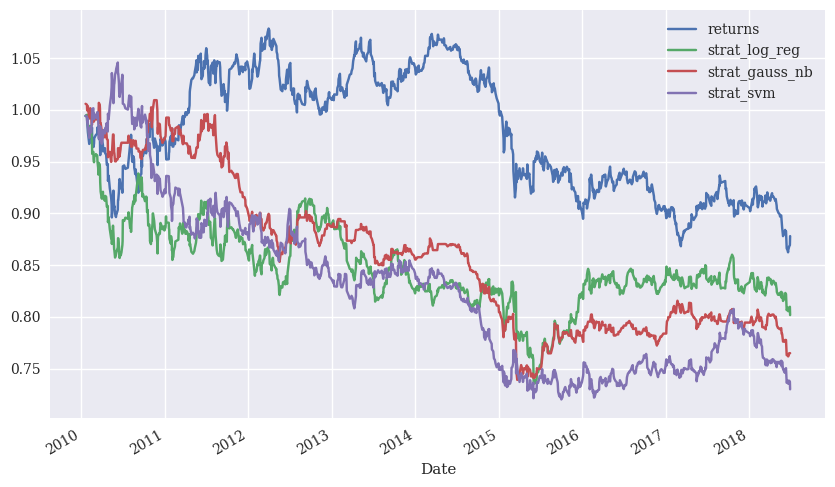

In [151]:

test[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

Figure 15-16. Performance of EUR/USD and classification-based trading strategies
(randomized train-test split)

In [152]:
from sklearn.neural_network import MLPClassifier

In [153]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=2 * [250], random_state=1)

In [154]:
%time model.fit(data[cols_bin], data['direction'])

CPU times: total: 19 s
Wall time: 5.89 s


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:606: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","[250, 250]"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'lbfgs'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",1e-05
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",200
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",1


In [155]:
data['pos_dnn_sk'] = model.predict(data[cols_bin])

In [156]:
data['strat_dnn_sk'] = data['pos_dnn_sk'] * data['returns']

In [157]:
data[['returns', 'strat_dnn_sk']].sum().apply(np.exp)

returns          0.805002
strat_dnn_sk    39.814778
dtype: float64

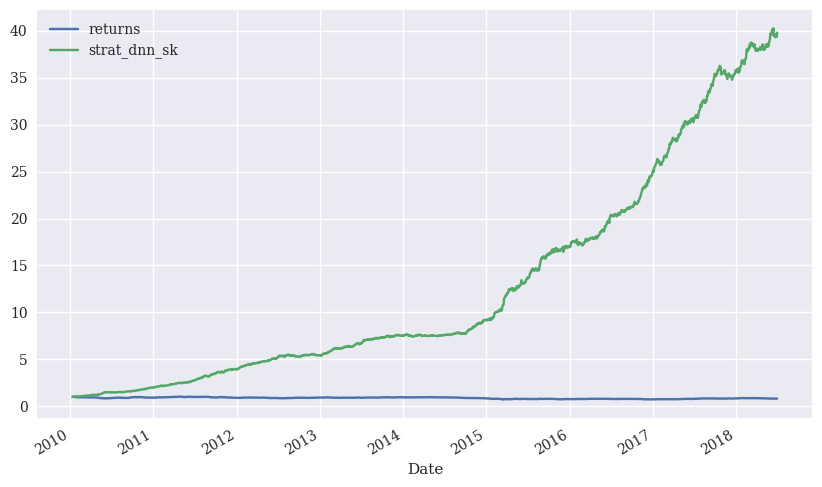

In [158]:
data[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6));

Figure 15-17. Performance of EUR/USD and DNN-based trading strategy (scikit-learn,
in-sample)

In [159]:
train, test = train_test_split(data, test_size=0.5, random_state=100)

In [160]:
train = train.copy().sort_index()

In [161]:
test = test.copy().sort_index()

In [162]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=500,
                     hidden_layer_sizes=3 * [500], random_state=1)  

In [163]:
%time model.fit(train[cols_bin], train['direction'])

CPU times: total: 2min 56s
Wall time: 48.9 s


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:606: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","[500, 500, ...]"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'lbfgs'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",1e-05
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",500
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",1


In [164]:
test['pos_dnn_sk'] = model.predict(test[cols_bin])

In [165]:
test['strat_dnn_sk'] = test['pos_dnn_sk'] * test['returns']

In [166]:
test[['returns', 'strat_dnn_sk']].sum().apply(np.exp)

returns         0.878078
strat_dnn_sk    1.217600
dtype: float64

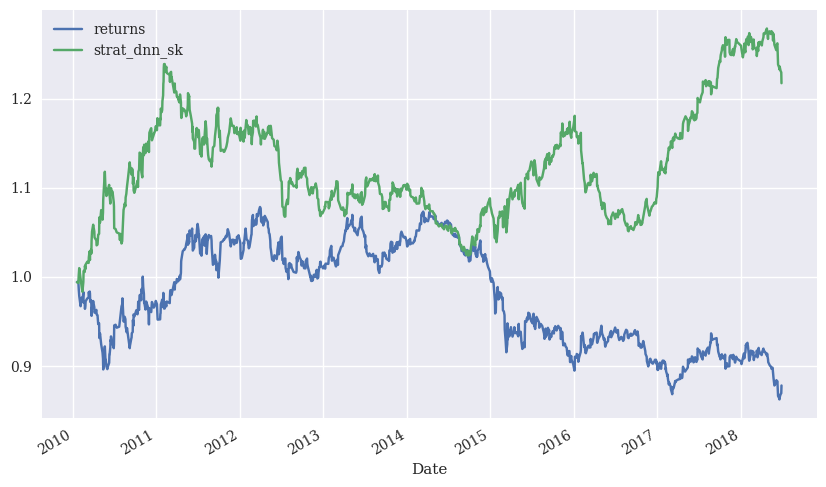

In [167]:
test[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6));

Figure 15-18. Performance of EUR/USD and DNN-based trading strategy (scikit-learn,
randomized train-test split)

In [168]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

In [169]:
def create_model():
    np.random.seed(100)
    tf.random.set_seed(100)
    model = Sequential()
    model.add(Dense(16, activation='relu', input_dim=lags))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

In [170]:
data_ = (data - data.mean()) / data.std()
data['direction_'] = np.where(data['direction'] == 1, 1, 0)

In [171]:
model = create_model()

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [172]:
%%time
model.fit(data_[cols], data['direction_'],
          epochs=50, verbose=False)

CPU times: total: 7.08 s
Wall time: 5.28 s


In [173]:
model.evaluate(data_[cols], data['direction_'])

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5694 - loss: 0.6765


[0.6764546036720276, 0.5694183707237244]

In [174]:
pred = np.where(model.predict(data_[cols]) > 0.5, 1, 0) 
pred[:10].flatten()

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [175]:
data['pos_dnn_ke'] = np.where(pred > 0, 1, -1)  

In [176]:
data['strat_dnn_ke'] = data['pos_dnn_ke'] * data['returns']


In [177]:
data[['returns', 'strat_dnn_ke']].sum().apply(np.exp)

returns         0.805002
strat_dnn_ke    3.588000
dtype: float64

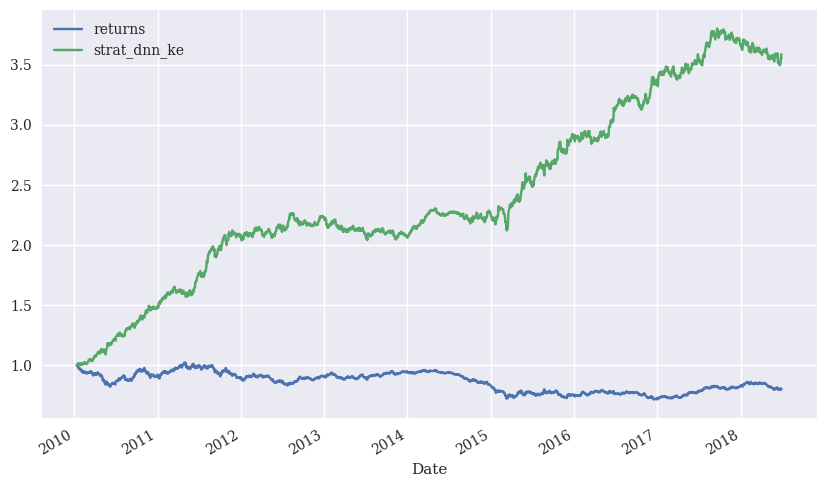

In [178]:
data[['returns', 'strat_dnn_ke']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));

Figure 15-19. Performance of EUR/USD and DNN-based trading strategy (TensorFlow,
in-sample)

In [179]:
mu, std = train.mean(), train.std()

In [180]:
train_ = (train - mu) / mu.std()

In [181]:
model = create_model()

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [182]:
train['direction_'] = np.where(train['direction'] > 0, 1, 0)

In [183]:
%%time
model.fit(train_[cols], train['direction_'],
          epochs=50, verbose=False)

CPU times: total: 5.23 s
Wall time: 3.82 s


In [184]:
test_ = (test - mu) / std

In [185]:
test['direction_'] = np.where(test['direction'] > 0, 1, 0)

In [186]:
model.evaluate(test_[cols], test['direction_'])

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4972 - loss: 0.8040  


[0.8039942979812622, 0.49718573689460754]

In [187]:
pred = np.where(model.predict(test_[cols]) > 0.5, 1, 0) 
pred[:10].flatten()

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [188]:
test['pos_dnn_ke'] = np.where(pred > 0, 1, -1)

In [189]:
test['strat_dnn_ke'] = test['pos_dnn_ke'] * test['returns']

In [190]:
test[['returns', 'strat_dnn_sk', 'strat_dnn_ke']].sum().apply(np.exp)

returns         0.878078
strat_dnn_sk    1.217600
strat_dnn_ke    0.802923
dtype: float64

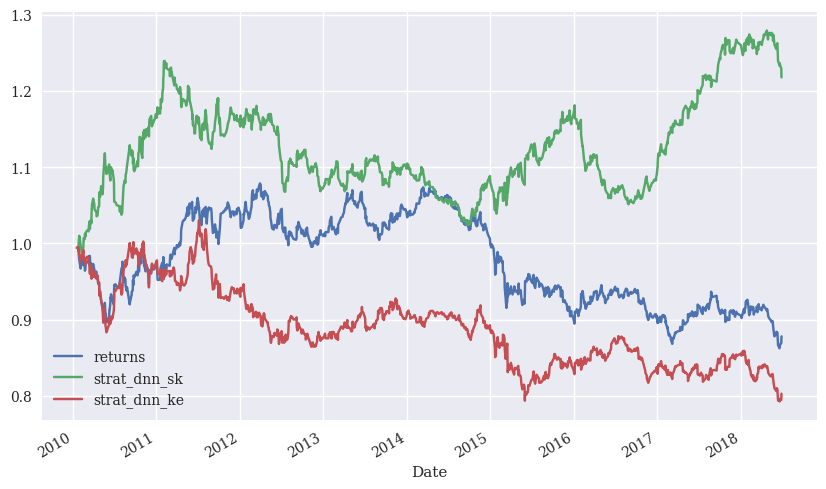

In [191]:
test[['returns', 'strat_dnn_sk', 'strat_dnn_ke']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));

Figure 15-20. Performance of EUR/USD and DNN-based trading strategy (TensorFlow,
randomized train-test split)